# Успеваемость учащихся (множественная линейная регрессия)

## Постановка задачи
Этот набор данных содержит успеваемость учащихся, как влияют внеклассные занятия и сон на учеников, а также от чего зависит индекс производительности.


### Подкючение модулей

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

### Загрузка данных

Загружаем файл Stu.csvdent_Performance.csv

In [5]:
df = pd.read_csv('Student_Performance.csv')

Выводим 10 первых записей

In [6]:
df.head(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
5,3,78,No,9,6,61.0
6,7,73,Yes,5,6,63.0
7,8,45,Yes,4,6,42.0
8,5,77,No,8,2,61.0
9,4,89,No,4,0,69.0


### Описание данных
Признаки:
- Hours Studied- Изученные часы
- Previous Scores	- Предыдущие результаты
- Extracurricular Activities - Внеклассные занятия
- Sleep Hours	- Часы сна
- Sample Question Papers Practiced - Практикуемые образцы заданий с вопросами
#### Целевая переменная
- Performance Index - Индекс произволительности

## Разведочный анализ данных(РАД, EDA)

In [7]:
df.shape

(10000, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


Посмотрели информацию и выяснили что всего  10000 строк и 6 признаков, нет пустых значений

In [9]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

Вывели какие типы данных содержат признаки

In [10]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

Вывели названия признаков

In [11]:
df['Extracurricular Activities']= df['Extracurricular Activities'].map({'Yes':1, 'No':0})

Перевели признак Extracurricular Activities в бинарное значение где 'Yes':1 и 'No':0

In [12]:
df.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,0.494800,6.530600,4.583300,55.224800
std,2.589309,17.343152,0.499998,1.695863,2.867348,19.212558
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


- срднее количество часов, потраченных каждым студентом на учебу составляет около 5 часов
- Средние баллы, полученные учащимися на предыдущих тестах составляет 70 баллов
- Среднее кол-во сна занимает 6,5 часов
- Максимальное число Образцов экзаменационных работ было проделано 9.

Также мы выяснили, что внеклассные мероприятия посещают почти 50% на 50% учеников

In [13]:
df["Extracurricular Activities"].value_counts()

Extracurricular Activities
0    5052
1    4948
Name: count, dtype: int64

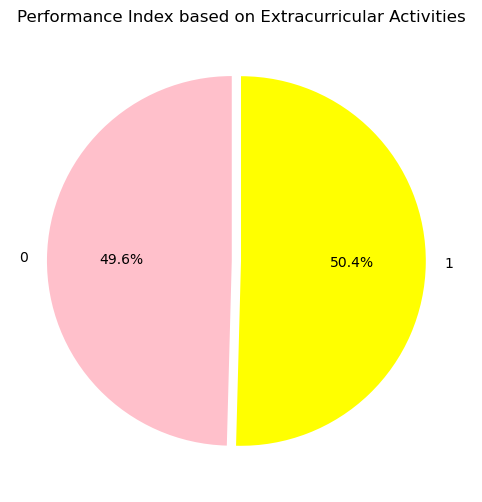

In [14]:
pie_data = df.groupby('Extracurricular Activities')['Performance Index'].mean()
plt.figure(figsize=(8, 6))
plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', colors=['pink', 'yellow'], startangle=90, explode=(0.05, 0))  # explode ile dilimlerden birini ayırabilirsiniz
plt.title('Performance Index based on Extracurricular Activities')
plt.show()

Мы вывели диаграмму Extracurricular Activities и увидели, что ученики ходящие на внеклассные занятия разделились поравну

In [15]:
df["Sleep Hours"].value_counts()

Sleep Hours
8    1804
7    1676
6    1673
9    1622
4    1619
5    1606
Name: count, dtype: int64

Вывели и узнали кол-во учеников, которые спят определенное время

In [16]:
df["Sample Question Papers Practiced"].value_counts()

Sample Question Papers Practiced
6    1059
9    1051
3    1035
5    1028
8    1026
7     987
1     978
4     955
0     951
2     930
Name: count, dtype: int64

Сколько учеников которые проктиковали определенное количество образцов вопросов

In [17]:
grouped_data= df.groupby("Hours Studied")["Sleep Hours"].value_counts().unstack()
grouped_data

Sleep Hours,4,5,6,7,8,9
Hours Studied,,,,,,
1,173,178,179,205,237,180
2,200,157,203,167,177,181
3,195,179,183,180,189,193
4,167,166,184,187,209,172
5,166,186,188,184,211,159
6,208,191,185,183,191,175
7,170,171,189,191,211,197
8,169,204,196,173,179,167
9,171,174,166,206,200,198


Применили группировку и сравнили часы сна с учебными часами

In [18]:
df.duplicated().sum()

127

Вывели кол-во дубликатов

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.shape

(9873, 6)

Удалили дубликаты и вывели кол-во строк

In [21]:
df["Hours Studied"].value_counts()

Hours Studied
1    1133
6    1122
7    1118
3    1110
9    1099
2    1077
8    1074
4    1071
5    1069
Name: count, dtype: int64

Вывели и узнали кол-во учеников, которые учатся определенное время

In [22]:
cut_series = pd.cut(df["Previous Scores"], bins=[40, 50, 60, 70, 80, 90, 100], labels=['40-50', '50-60', '60-70', '70-80', '80-90', '90-100'])
value_counts = cut_series.value_counts().sort_index()

value_counts.reset_index()

,Previous Scores,count
0,40-50,1609
1,50-60,1726
2,60-70,1637
3,70-80,1587
4,80-90,1680
5,90-100,1463


In [23]:
cut_series = pd.cut(df["Performance Index"], bins=[40, 50, 60, 70, 80, 90, 100], labels=['40-50', '50-60', '60-70', '70-80', '80-90', '90-100'])
value_counts = cut_series.value_counts().sort_index()

value_counts.reset_index()

,Performance Index,count
0,40-50,1672
1,50-60,1602
2,60-70,1601
3,70-80,1412
4,80-90,850
5,90-100,206


Вывели предыдущие и нынешние результаты студентов и сравнили их

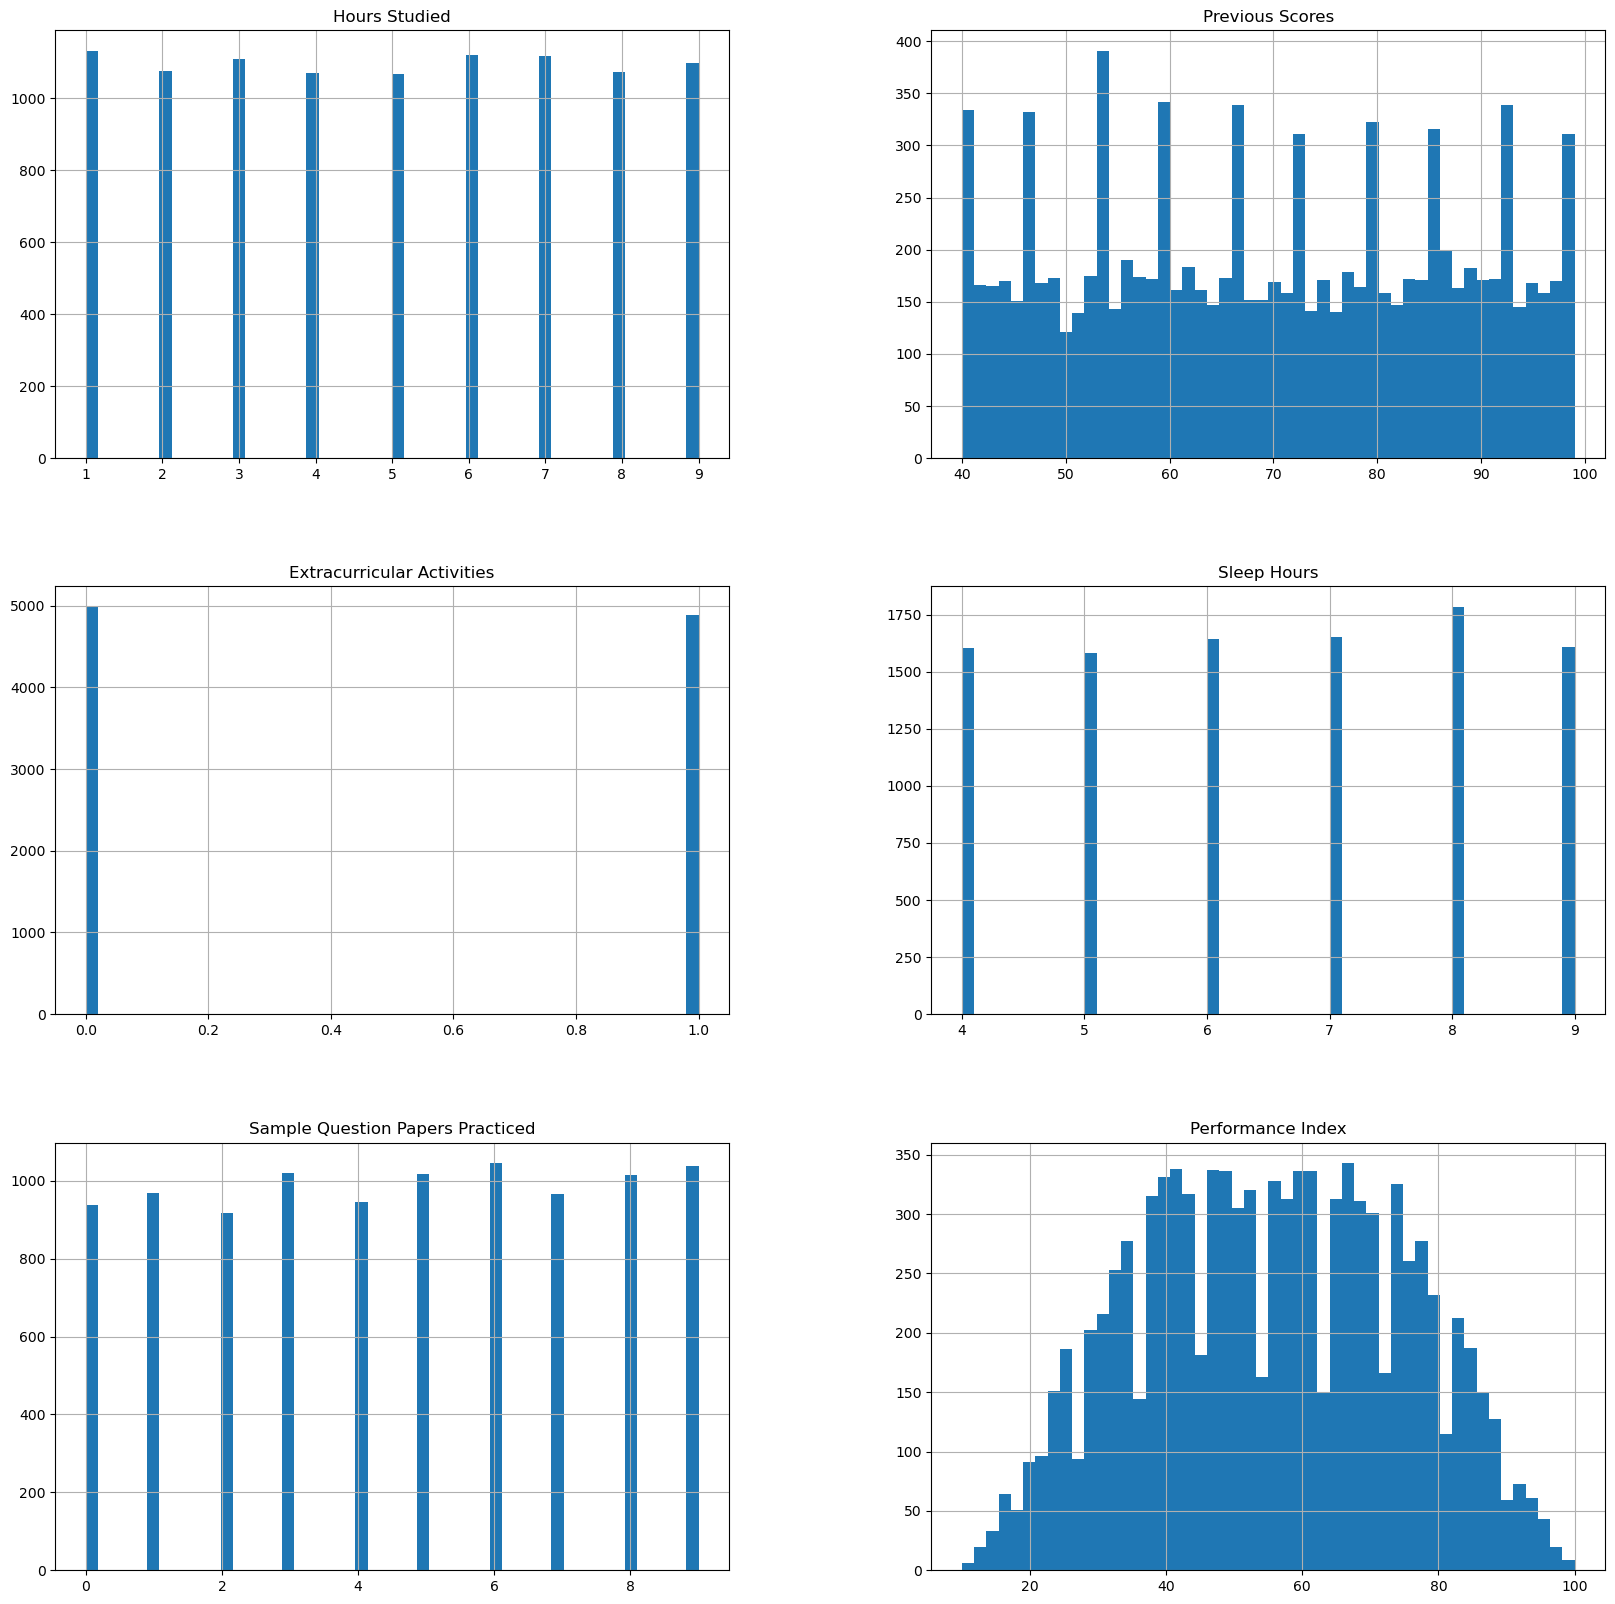

In [24]:
df.hist(figsize=(20,20), bins=50);

Просмотрели как расспределяются данные и увидели, что они равномерные

<Figure size 800x600 with 0 Axes>

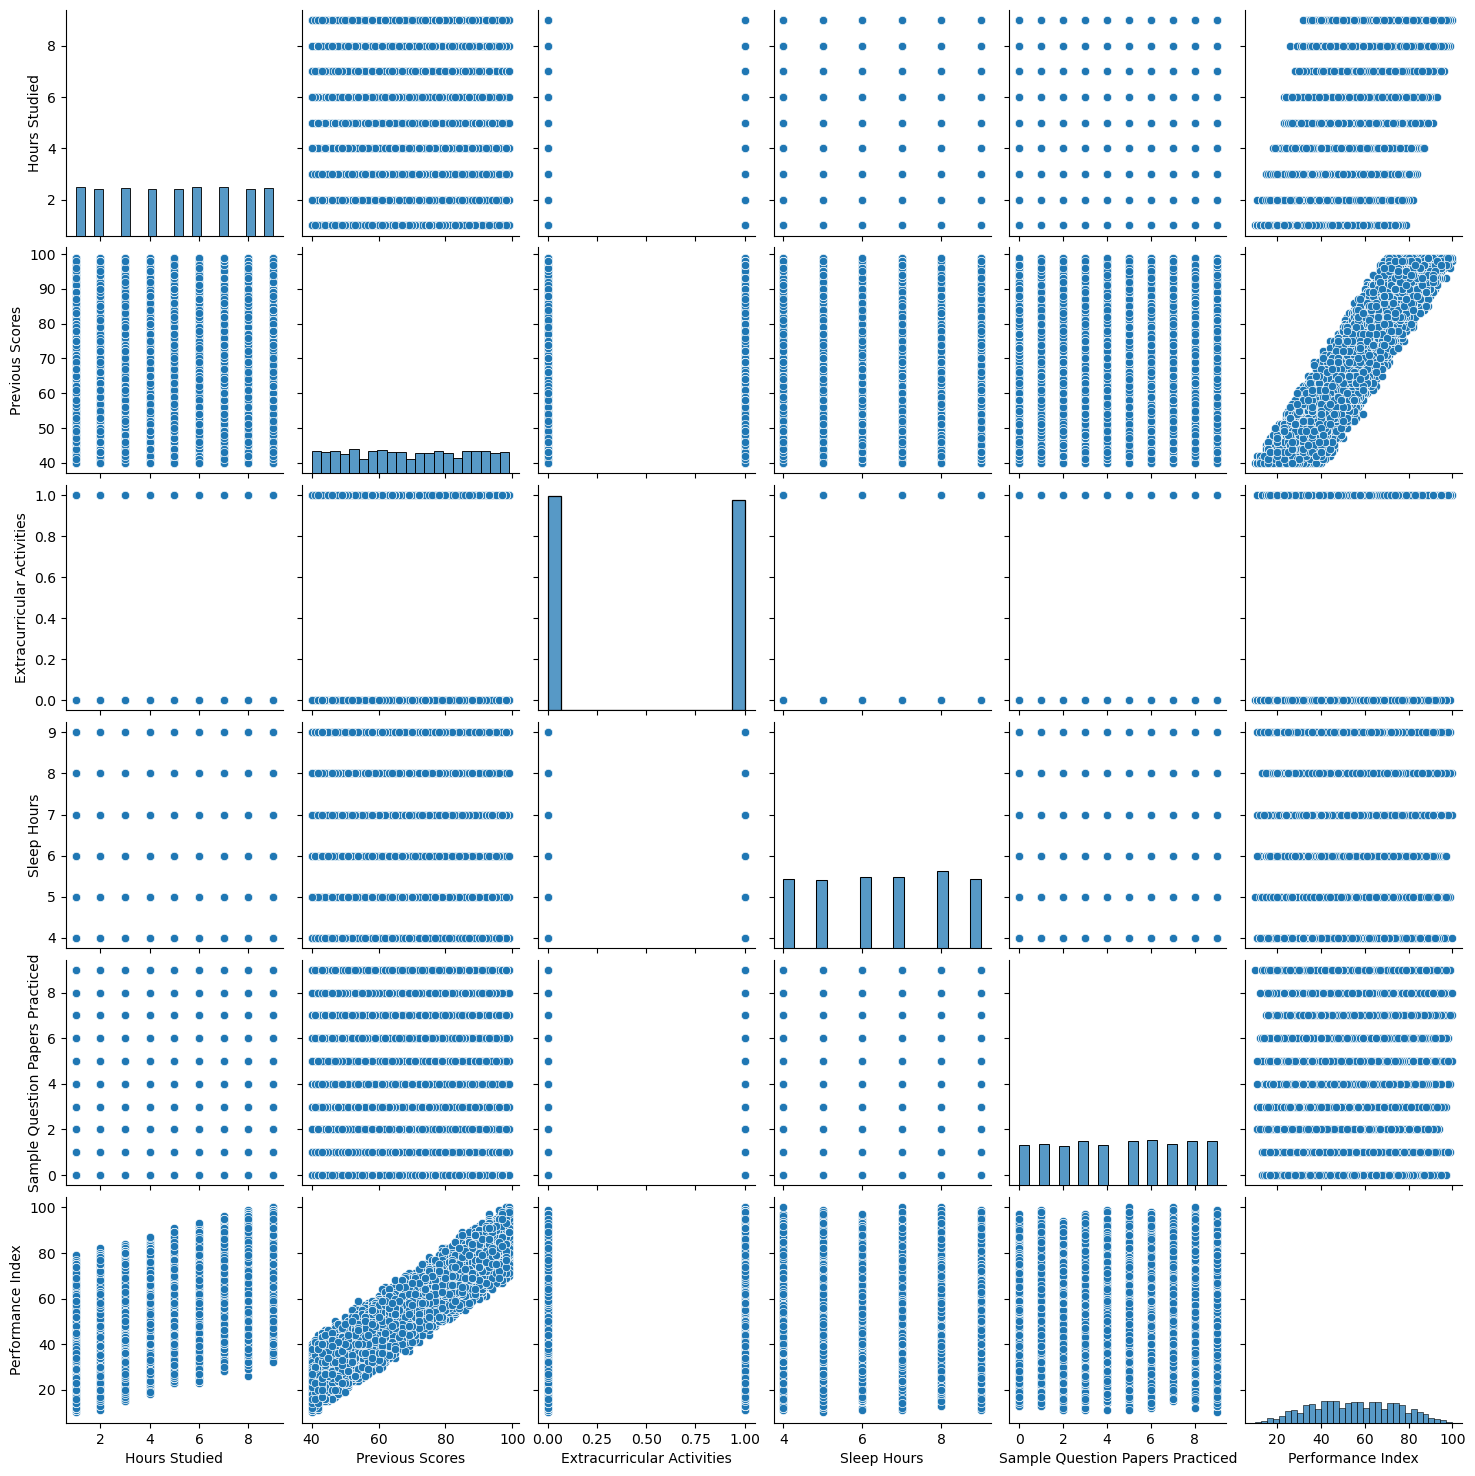

In [25]:
plt.figure(figsize=(8,6))
sns.pairplot(df)

<Axes: >

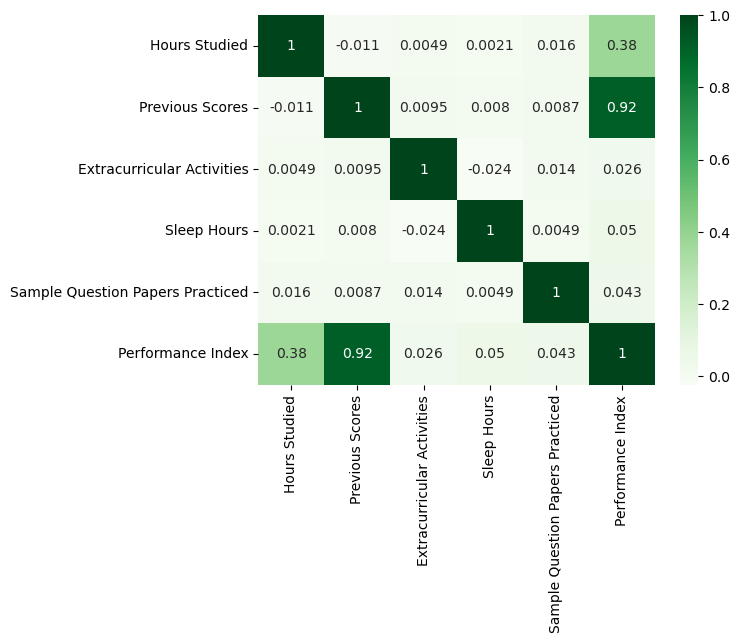

In [26]:
sns.heatmap(df.corr(), annot=True, cmap='Greens')

Просмотрели корреляцию и можем увидеть, что присутвует зависимость между Hours Studied и Performance Index (Производительность ученика зависит от того сколько часов он тратит на учебу) и между Previous Scores и Performance Index.

## Modeling

In [27]:
y = df['Performance Index']

In [28]:
del df['Performance Index']
X = df.copy()

Обозначаем целевую переменную и выделяем все нужные признаки для обучения

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y ,test_size=0.3, random_state=42)

In [30]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(6911, 5) (2962, 5) (6911,) (2962,)


Разделяем выборку на тестовую и обучающую и смотрим на размеры выборок

### Линейная регрессия (LinearRegression)

In [31]:
reg = LinearRegression()

In [32]:
reg.fit(X_train,Y_train)

LinearRegression()

In [33]:
y_pred=reg.predict(X_test)

Вывели предсказание

In [34]:
print('mean_Absolute-Error',metrics.mean_absolute_error(Y_test,y_pred))
print('mean-squared-error',metrics.mean_squared_error(Y_test,y_pred))
print('r2score',metrics.r2_score(Y_test,y_pred))

mean_Absolute-Error 1.646199745534188
mean-squared-error 4.326180232071977
r2score 0.9881593003934889


Вывели:
- Среднее значение абсолютного значения ошибок - 1,65
- Среднее значение квадратов ошибо - 4,33
-  Квадратный корень из среднего квадрата ошибо -  0,99

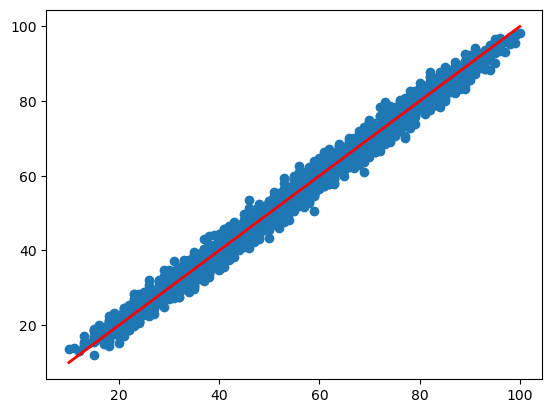

In [35]:
plt.scatter(Y_test,y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', lw=2)

В данной модели LinearRegression предсказанные значения выглядят реальными 

In [36]:
kf = KFold(10)
cross_val = cross_val_score(reg, X_train, Y_train, cv=kf, scoring='r2')
cv_mean = np.mean(cross_val)

In [37]:
print("Train CV scores :", cross_val)
print("Train CV mean :", round(cv_mean, 3))

Train CV scores : [0.98980005 0.9889074  0.98749759 0.98934197 0.98955754 0.98729622
 0.9892498  0.98904311 0.98841397 0.98929543]
Train CV mean : 0.989


In [38]:
kf = KFold(5)
cross_val = cross_val_score(reg, X_train, Y_train, cv=kf, scoring='r2')
cv_mean = np.mean(cross_val)

In [39]:
print("Train CV scores :", cross_val)
print("Train CV mean :", round(cv_mean, 3))

Train CV scores : [0.98936602 0.98843614 0.98851921 0.98914535 0.98885592]
Train CV mean : 0.989


Проделали кросс-валидацию модели и  вывели средний результат 0,99 и 0,99.

### Провели обучение при помощи DecisionTreeRegressor

In [40]:
decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regressor.fit(X_train, Y_train)

DecisionTreeRegressor()

In [41]:
Y_pred = decision_tree_regressor.predict(X_test)

Выполнили предсказание

In [42]:
mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(np.sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)


In [43]:
print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 3.036
R-squared value of the model is : 0.975


Посмотрели насколько хорошо модель выполняет свою задачу по предсказанию на тестовых данных,

Представлением о средней ошибке предсказаний состовляет: 3,04, а результатом R^2 -является 0,98, что практически идеально

In [44]:
print('mean_Absolute-Error',metrics.mean_absolute_error(Y_test,Y_pred))
print('mean-squared-error',metrics.mean_squared_error(Y_test,Y_pred))
print('r2score',metrics.r2_score(Y_test,Y_pred))

mean_Absolute-Error 2.411208642808913
mean-squared-error 9.218095881161377
r2score 0.974770190233019


Вывели:
- Среднее значение абсолютного значения ошибок - 2,44
- Среднее значение квадратов ошибок - 9,35
- Квадратный корень из среднего квадрата ошибок - 0,97

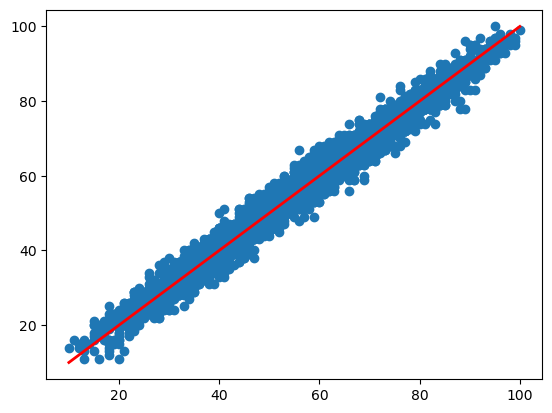

In [45]:
plt.scatter(Y_test,Y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', lw=2)

Проделав работу с данной моделью, можно сделать вывод о том,что в DecisionTreeRegressor выглядит чуть хуже, чем LinearRegression

### RandomForestRegressor

In [46]:
rfc = RandomForestRegressor()
rfc.fit(X_train,Y_train)

RandomForestRegressor()

In [47]:
Y_pred_rfc = rfc.predict(X_test)

Выполнили предсказание

In [48]:
mse = round(mean_squared_error(Y_test, Y_pred_rfc), 3)
rmse = round(np.sqrt(mse), 3)
r2_value = round(r2_score(Y_test, Y_pred_rfc), 3)

In [49]:
print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 2.375
R-squared value of the model is : 0.985


Представлением о средней ошибке предсказаний состовляет: 2,38, а
результатом R^2 насколько хорошо модель объясняет данные -является 0,99, что практически идеально

In [50]:
print('mean_Absolute-Error',metrics.mean_absolute_error(Y_test,Y_pred_rfc))
print('mean-squared-error',metrics.mean_squared_error(Y_test,Y_pred_rfc))
print('r2score',metrics.r2_score(Y_test,Y_pred_rfc))

mean_Absolute-Error 1.8896212903122085
mean-squared-error 5.639862726711437
r2score 0.9845637683160127


Вывели:
- Среднее значение абсолютного значения ошибок - 1,89
- Среднее значение квадратов ошибок - 5,64
- Квадратный корень из среднего квадрата ошибок - 0,98

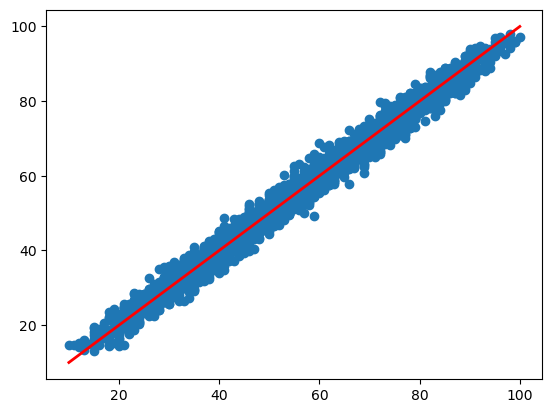

In [51]:
plt.scatter(Y_test,Y_pred_rfc)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', lw=2)

Проделав работу с данной моделью, можно сделать вывод о том,что в RandomForestRegressor выглядят лучше чем DecisionTreeRegressor, но чуть хуже чем LinearRegression

## Вывод
Вывели наш датасет и провели разведочный анализ данных
- Произвели замену значений признака внеклассные занятия на бинарные значения
- Просмотрели диаграммы и сделали выводы
- Сгруппировали признаки часов сна с учебными часами, сравнили их
- удалили дубликаты
- Сравнили предыдущие результаты учеников и нынешний индекс их произволительности
- просмотрели что присутвут корреляция и какие признаки коррелируют между собой (Hours Studied и Perfomance Index, Previous Scores и Perfomance Index)


### Провели обучение 3х моделей. Таких как LinearRegression, DecisionTreeRegressor, RandomForestRegressor

LinearRegression
- Среднее значение абсолютного значения ошибок - 1,65
- Среднее значение квадратов ошибок - 4,33
- Квадратный корень из среднего квадрата ошибок - 0,99

DecisionTreeRegressor
- Среднее значение абсолютного значения ошибок - 2,44
- Среднее значение квадратов ошибок - 9,35
- Квадратный корень из среднего квадрата ошибок - 0,97

RandomForestRegressor
- Среднее значение абсолютного значения ошибок - 1,89
- Среднее значение квадратов ошибок - 5,66- 
- Квадратный корень из среднего квадрата ошибок - 0,98

#### Самой наилучшей метрикой является LinearRegression из всех остальных